<a href="https://colab.research.google.com/github/BigDave07/Stock-Price-Prediction/blob/main/Stock_Price_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [5]:
import yfinance as yf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [8]:
#Load Data
# fetch 3 years of data for one stock
data = yf.download("AAPL", start="2022-01-01", end="2025-01-01")
data = data[["Close"]]  #We only need closing prices
data.head()

/tmp/ipython-input-3181439654.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2022-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2022-01-03,178.443115
2022-01-04,176.178406
2022-01-05,171.492050
2022-01-06,168.629318
2022-01-07,168.795975


In [13]:
## create lag features (previous 7 days)
for lag in range(1,8):
  data[f"lag_{lag}"] = data["Close"].shift(lag)

#drop first few NANs
data = data.dropna()
X = data[[f"lag_{i}" for i in range(1,8)]]
y = data["Close"]

In [16]:
#Train Test Split
split = int(len(data)*0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split] ,y.iloc[split:]

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s= scaler.transform(X_test)

In [17]:
#Train Neural Network
mlp = MLPRegressor(hidden_layer_sizes=(64,32), random_state=42, max_iter=500, activation='relu', solver='adam', learning_rate_init=1e-3)
mlp.fit(X_train_s, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [18]:
#Evaluate Performance
y_pred = mlp.predict(X_test_s)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")

RMSE: 25.63774330424145
MSE: 657.2938817341773


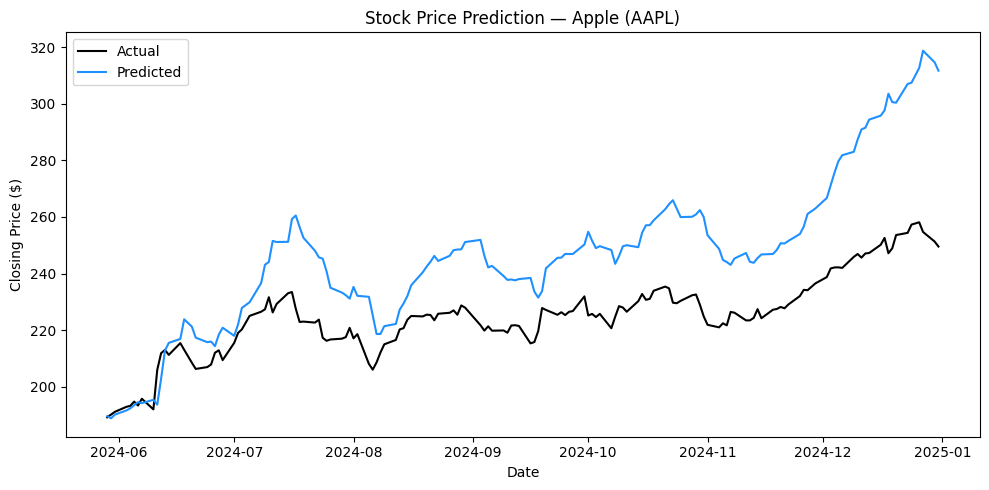

In [21]:
#Visualize Result
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label="Actual", color="black")
plt.plot(y_test.index, y_pred, label="Predicted", color="dodgerblue")
plt.title("Stock Price Prediction — Apple (AAPL)")
plt.xlabel("Date"); plt.ylabel("Closing Price ($)")
plt.legend(); plt.tight_layout()
plt.savefig("stock_price_prediction.png")
plt.show()


In [22]:
# predict next day's price
last_days = X.iloc[-1:].values
next_input = scaler.transform(last_days)
next_day_price = mlp.predict(next_input)[0]
print(f"Predicted next closing price: ${next_day_price:.2f}")


Predicted next closing price: $311.68
